In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import os
# os.environ["QISKIT_IN_PARALLEL"] = 'TRUE'

In [3]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["font.size"] = 16

from qiskit import QuantumCircuit, IBMQ, schedule
import qiskit.pulse as pulse
from qiskit.quantum_info.states import Statevector, DensityMatrix
from qiskit_dynamics import Solver, Signal
from qiskit_dynamics.pulse import InstructionToSignals
from qiskit.providers import BackendV2, QubitProperties
from qiskit.providers.options import Options
from qiskit.transpiler import Target


from qiskit.providers.models import PulseDefaults
from qiskit.qobj.pulse_qobj import PulseLibraryItem, PulseQobjInstruction
from qiskit.providers.models.pulsedefaults import Command

from qiskit_experiments.exceptions import QiskitError

In [4]:
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")
# backend = provider.get_backend("ibmq_lima")

In [5]:
from qiskit_experiments.test.iq_pulse_backend import SingleTransmonTestBackend
pulse_backend = SingleTransmonTestBackend()

# Calibration Experiments

In [6]:
from qiskit_experiments.calibration_management.calibrations import Calibrations
from qiskit_experiments.calibration_management.basis_gate_library import (
    FixedFrequencyTransmon,
)

## spectroscopy

In [7]:
from qiskit_experiments.library.calibration.rough_frequency import RoughFrequencyCal

qubit = 0
library = FixedFrequencyTransmon()
cals = Calibrations.from_backend(pulse_backend, libraries=[library])

freq01_estimate = pulse_backend.defaults().qubit_freq_est[qubit]
frequencies = np.linspace(freq01_estimate - 15e6, freq01_estimate + 15e6, 51)
spec = RoughFrequencyCal(qubit, cals, frequencies, backend=pulse_backend)
spec.set_experiment_options(amp=0.005)

In [8]:
spec_data = spec.run().block_for_results()

/home/rupeshknn/miniconda3/envs/exp/lib/python3.8/site-packages/numpy/lib/function_base.py:2411: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


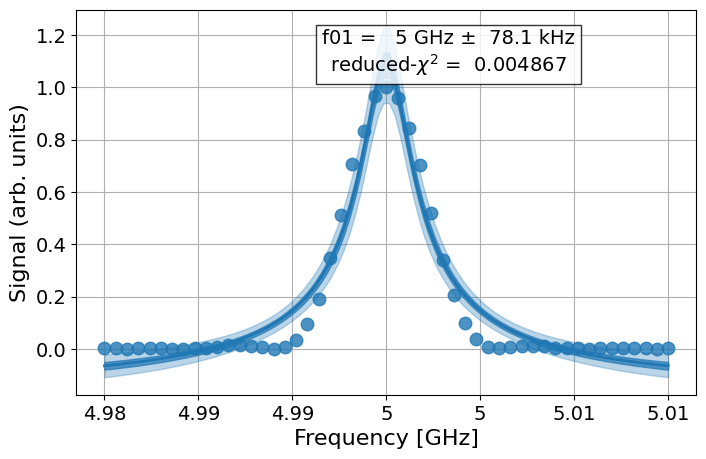

In [9]:
spec_data.figure(0)

In [10]:
print(spec_data.analysis_results("f01"))

AnalysisResult
- name: f01
- value: (5.00000+/-0.00008)e+09
- χ²: 0.004866668962915411
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False


## Rabi

In [11]:
from qiskit_experiments.library.calibration import RoughXSXAmplitudeCal

rabi = RoughXSXAmplitudeCal(
    qubit, cals, backend=pulse_backend, amplitudes=np.linspace(-0.1, 0.1, 51)
)

In [12]:
rabi_data = rabi.run().block_for_results()

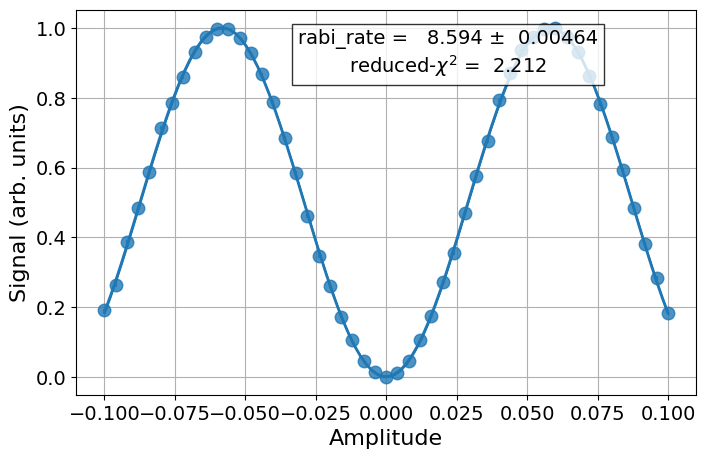

In [13]:
rabi_data.figure(0)

In [14]:
print(rabi_data.analysis_results("rabi_rate"))

AnalysisResult
- name: rabi_rate
- value: 8.594+/-0.005
- χ²: 2.211728618610856
- quality: good
- device_components: ['Q0']
- verified: False


In [15]:
cals.get_schedule("sx", qubit)

ScheduleBlock(Play(Drag(duration=160, amp=(0.02909134+0j), sigma=40, beta=0), DriveChannel(0)), name="sx", transform=AlignLeft())

In [16]:
cals.get_schedule("x", qubit)

ScheduleBlock(Play(Drag(duration=160, amp=(0.05818269+0j), sigma=40, beta=0), DriveChannel(0)), name="x", transform=AlignLeft())